In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Load the dataset
file_path = "/Users/simonknudsen/Downloads/ESS11/ESS11.csv"  # Update file path if needed
df = pd.read_csv(file_path, low_memory=False)

In [3]:
# Education level grouping
education_groups = {
    # Higher Education
    510: "Higher Education", 520: "Higher Education",
    610: "Higher Education", 620: "Higher Education",
    710: "Higher Education", 720: "Higher Education",
    800: "Higher Education",

    # Upper Secondary
    311: "Upper Secondary", 312: "Upper Secondary",
    313: "Upper Secondary", 321: "Upper Secondary",
    322: "Upper Secondary", 323: "Upper Secondary",
    412: "Upper Secondary", 413: "Upper Secondary",
    421: "Upper Secondary", 422: "Upper Secondary",
    423: "Upper Secondary",

    # Lower Education
    0: "Lower Education", 113: "Lower Education",
    129: "Lower Education", 212: "Lower Education",
    213: "Lower Education", 221: "Lower Education",
    222: "Lower Education", 223: "Lower Education",
    229: "Lower Education",

    # Other
    5555: "Other"
}

In [4]:
# Apply the grouping
for col in ['edulvlb', 'edulvlfb', 'edulvlmb']:
    df[f'{col}_grouped'] = df[col].map(education_groups)

In [5]:
# Define features and target
target_variable = 'edulvlb_grouped'
features = ['edulvlfb_grouped', 'edulvlmb_grouped', 'hincfel', 'ppltrst', 'pplfair',
            'health', 'happy', 'stflife', 'gndr', 'agea', 'cntry']

In [6]:
# Separate features and target variable
X = df[features].copy()
y = df[target_variable].copy()

In [7]:
# Encode categorical variables
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
# Encode categorical features
categorical_features = ['edulvlfb_grouped', 'edulvlmb_grouped', 'cntry', 'gndr']
for col in categorical_features:
    X[col] = le.fit_transform(X[col])

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Initialize and train random forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, random_state=42)

In [12]:
# Predict on training and testing sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [13]:
# Print evaluation metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 0.7752459220520483
Test Accuracy: 0.608441235059761

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      2635
           1       0.55      0.71      0.62      1795
           2       0.00      0.00      0.00        27
           3       0.64      0.54      0.59      3550
           4       0.22      0.08      0.12        25

    accuracy                           0.61      8032
   macro avg       0.41      0.39      0.39      8032
weighted avg       0.61      0.61      0.61      8032


Confusion Matrix (Test Set):
[[1669  270    0  694    2]
 [ 133 1282    0  377    3]
 [   7   10    0   10    0]
 [ 852  762    0 1934    2]
 [   2    8    0   13    2]]


/Users/simonknudsen/opt/anaconda3/envs/machinelearning/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/simonknudsen/opt/anaconda3/envs/machinelearning/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/simonknudsen/opt/anaconda3/envs/machinelearning/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [14]:
# Extract feature importance
feature_importance = rf_model.feature_importances_
feature_names = X.columns

In [15]:
# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

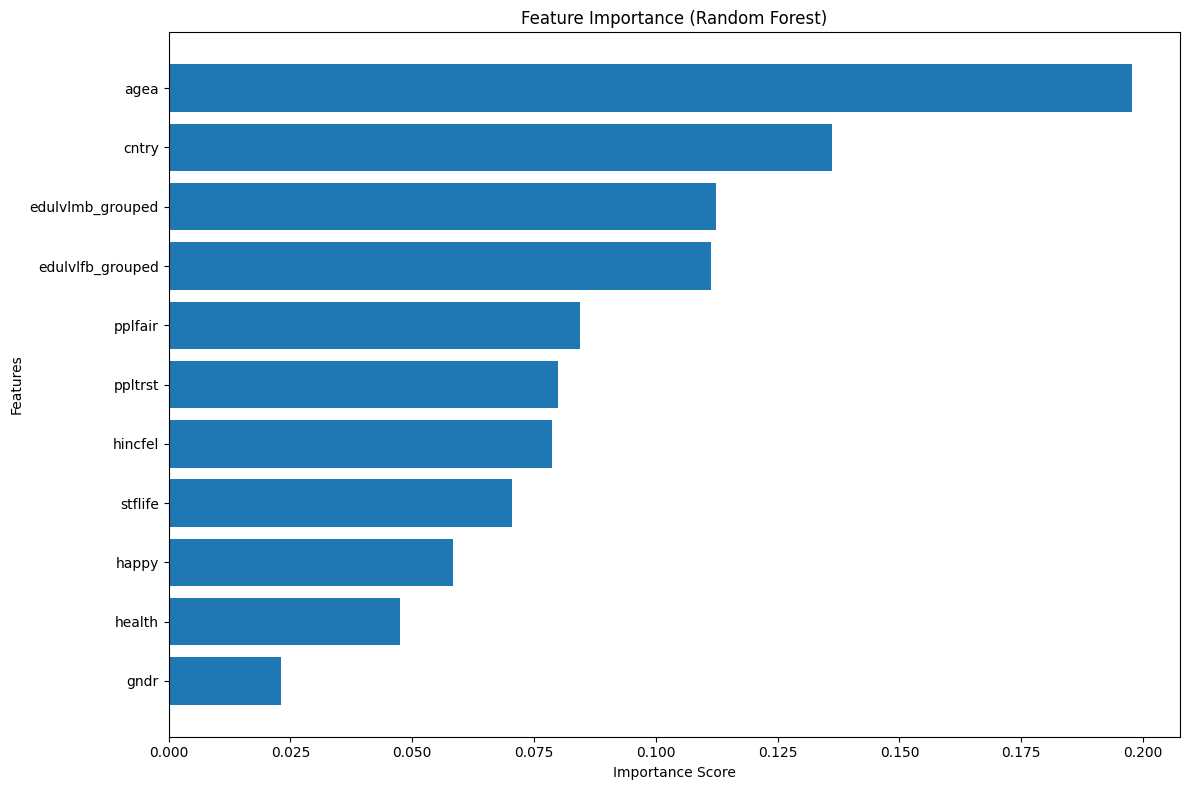

In [16]:
# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_importance)), sorted_importance, align='center')
plt.yticks(range(len(sorted_importance)), sorted_features)
plt.gca().invert_yaxis()
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()